# Medical Imaging
## 2020-2021

### Lab 4

### Group 13:
- Alexandra Gonçalves | nº89785
- Catarina Carvalho   | nº89791
- Diogo Vieira        | nº89794
- Mariana Mourão      | nº98473

### Importing relevant libraries

In [1]:
from __future__ import print_function
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import warnings

### Define Constants

In [2]:
# CONSTANTS
gamma = 42.575 # MHz/T
T1    = 700     # ms
T2    = 70    # ms
# w1 = B1*gamma
TR    = 500    # ms 

## 1. Excitation (ignoring relaxation) by a 90º flip angle $B_1$ pulse along + $x$ with duration 10 ms

In [3]:
# DEFINE VARIABLES AND CREATE DATA MATRIX

# Define time step, duration and time vector
deltaT    = 0.1    
duration  = 10   # ms
time      = np.linspace(0,duration,int(duration/deltaT) + 1)

# Define flip angle (90º) and elementar angle (arg)
flipangle = np.pi/2; 
arg       = flipangle*(deltaT/duration); 

# Create matrix M containing the x, y and z positions over the time period. Define initial vector position
M         = np.zeros((3,len(time)))
M[:,0]    = [0,0,1] 

# Iteratively fill M with the remaining positions using the Bloch equations for excitation
for i in range(len(time) - 1):
    Mx_new = 1*M[0,i] + 0*M[1,i]           + 0*M[2,i]
    My_new = 0*M[0,i] + np.cos(arg)*M[1,i] + np.sin(arg)*M[2,i]
    Mz_new = 0*M[0,i] - np.sin(arg)*M[1,i] + np.cos(arg)*M[2,i]
    M[:,i+1] = [Mx_new,My_new,Mz_new]

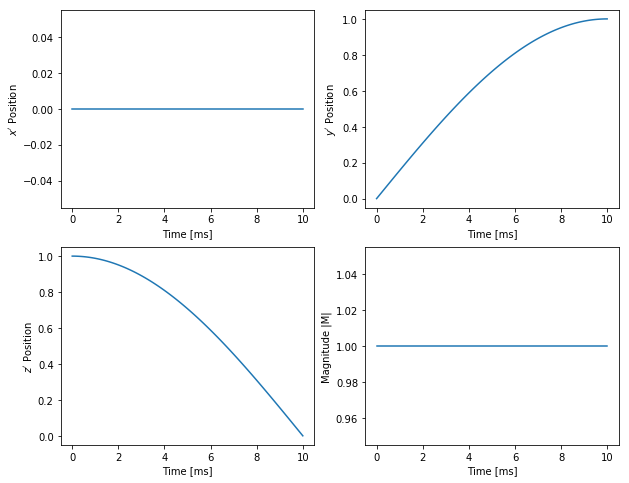

In [4]:
# RESULTS - 2D PLOTS

%matplotlib inline
plt.figure(figsize=(10,8))
for i in range(3):
    plt.subplot(2,2,i+1)
    plt.plot(time,M[i,:])
    plt.xlabel('Time [ms]')
    if i == 0:
        plt.ylabel('$x^\prime$ Position')
    if i == 1:
        plt.ylabel('$y^\prime$ Position')
    if i == 2:
        plt.ylabel('$z^\prime$ Position')


plt.subplot(2,2,4)
M_mag = np.linalg.norm(M,axis=0)
plt.plot(time,M_mag)
plt.ylabel('Magnitude |M|')
plt.xlabel('Time [ms]')
plt.show()

In [ ]:
# RESULTS - 3D PLOTS

%matplotlib tk 
#change notebook to "tk" to open new window and allow interactiveness 
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"),figsize=(4,4))

def get_arrow(i):
    i = int(i)
    x = 0
    y = 0
    z = 0
    u = M[0][i]
    v = M[1][i]
    w = M[2][i]
    return x,y,z,u,v,w

quiver = ax.quiver(*get_arrow(0))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel('$x^\prime$')
ax.set_ylabel('$y^\prime$')
ax.set_zlabel('$z^\prime$')
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])
#ax.azim = 0
#ax.dist = 10
#ax.elev = 30

def update(i):
    global quiver
    quiver.remove()
    quiver = ax.quiver(*get_arrow(i))

ani = FuncAnimation(fig, update, frames=np.arange(len(M[0])), interval=10)
plt.draw()
plt.show()

## 2. Relaxation after 90º excitation simulated 1., for an observation period of 490 ms

In [5]:
# Define time step, duration and time vector
#deltaT    = 0.1    
#duration  = 10   # ms
#time      = np.linspace(0,duration,int(duration/deltaT) + 1)

# Define flip angle (90º) and elementar angle (arg)
#flipangle = np.pi/2; 
#arg       = flipangle*(deltaT/duration);

# Create matrix M containing the x, y and z positions over the time period. Define initial vector position
#M_relax         = np.zeros((3,len(time)))
#M_relax[:,0]    = [0,0,1]

# Iteratively fill M with the remaining positions using the Bloch equations for excitation
#for i in range(len(time)-1):
#    Mx_new = 1*M_relax[0,i] + 0*M_relax[1,i]           + 0*M_relax[2,i]
#    My_new = 0*M_relax[0,i] + np.cos(arg)*M_relax[1,i] + np.sin(arg)*M_relax[2,i]
#    Mz_new = 0*M_relax[0,i] - np.sin(arg)*M_relax[1,i] + np.cos(arg)*M_relax[2,i]
#    M[:,i+1] = [Mx_new,My_new,Mz_new]

T_obs = 490 #observation period, in ms 
time_relax = np.linspace(0,T_obs,int(T_obs/deltaT) + 1)

M_relax = np.zeros((3,len(time_relax)))
M_relax[:,0] = M[:,-1]

for i in range(len(time_relax)-1):
    Mx_new = np.exp(-deltaT/T2)*M_relax[0,i]
    My_new = np.exp(-deltaT/T2)*M_relax[1,i]
    Mz_new = np.exp(-deltaT/T1)*M_relax[2,i] + 1*(1-np.exp(-deltaT/T1))
    M_relax[:,i+1] = [Mx_new,My_new,Mz_new]
#print(M)

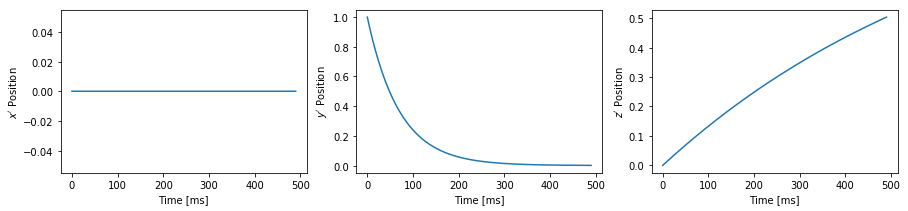

In [6]:
# RESULTS - 2D PLOTS

%matplotlib inline
plt.figure(figsize=(15,3))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(time_relax,M_relax[i,:])
    plt.xlabel('Time [ms]')
    if i == 0:
        plt.ylabel('$x^\prime$ Position')
    if i == 1:
        plt.ylabel('$y^\prime$ Position')
    if i == 2:
        plt.ylabel('$z^\prime$ Position')
plt.show()

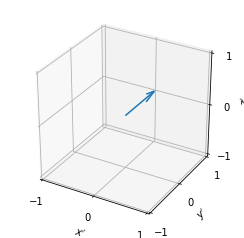

In [7]:
%matplotlib tk 
#change notebook to "tk" to open new window and allow interactiveness 
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"),figsize=(4,4))

def get_arrow(i):
    i = int(i)
    x = 0
    y = 0
    z = 0
    u = M_relax[0][i]
    v = M_relax[1][i]
    w = M_relax[2][i]
    return x,y,z,u,v,w

quiver = ax.quiver(*get_arrow(0))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel('$x^\prime$')
ax.set_ylabel('$y^\prime$')
ax.set_zlabel('$z^\prime$')
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])

def update(i):
    global quiver
    quiver.remove()
    quiver = ax.quiver(*get_arrow(i))

ani = FuncAnimation(fig, update, frames=np.arange(len(M_relax[0])), interval=10)
plt.draw()
plt.show()

## 3. Excitation + Relaxation for a 60º flip angle 

#### Excitation (ignoring relaxation) by a 60º flip angle  𝐵1  pulse along +  𝑥  with duration 10 ms

In [7]:
flipangle = np.pi*60/180; # 60 degrees in radians 
arg = flipangle*(deltaT/duration); 

# Create matrix M containing the x, y and z positions over the time period. Define initial vector position
M_60         = np.zeros((3,len(time)))
M_60[:,0]    = [0,0,1] 

# Iteratively fill M with the remaining positions using the Bloch equations for excitation
for i in range(len(time) - 1):
    Mx_new = 1*M_60[0,i] + 0*M_60[1,i]           + 0*M_60[2,i]
    My_new = 0*M_60[0,i] + np.cos(arg)*M_60[1,i] + np.sin(arg)*M_60[2,i]
    Mz_new = 0*M_60[0,i] - np.sin(arg)*M_60[1,i] + np.cos(arg)*M_60[2,i]
    M_60[:,i+1] = [Mx_new,My_new,Mz_new]

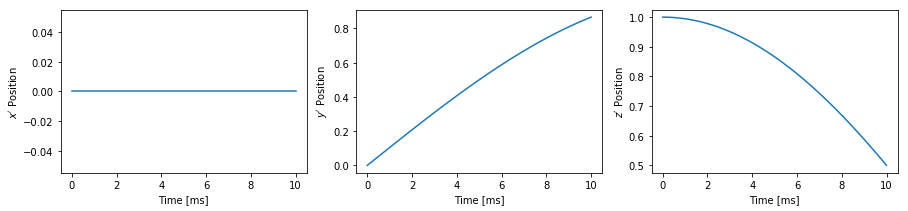

In [8]:
# RESULTS - 2D PLOTS    
%matplotlib inline
plt.figure(figsize=(15,3))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(time,M_60[i,:])
    plt.xlabel('Time [ms]')
    if i == 0:
        plt.ylabel('$x^\prime$ Position')
    if i == 1:
        plt.ylabel('$y^\prime$ Position')
    if i == 2:
        plt.ylabel('$z^\prime$ Position')
plt.show()

In [15]:
# RESULTS - 3D PLOTS

%matplotlib tk 
#change notebook to "tk" to open new window and allow interactiveness 
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"),figsize=(4,4))

def get_arrow(i):
    i = int(i)
    x = 0
    y = 0
    z = 0
    u = M_60[0][i]
    v = M_60[1][i]
    w = M_60[2][i]
    return x,y,z,u,v,w

quiver = ax.quiver(*get_arrow(0))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel('$x^\prime$')
ax.set_ylabel('$y^\prime$')
ax.set_zlabel('$z^\prime$')
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])

def update(i):
    global quiver
    quiver.remove()
    quiver = ax.quiver(*get_arrow(i))

ani = FuncAnimation(fig, update, frames=np.arange(len(M_60[0])), interval=10)
plt.draw()
plt.show()

#### Relaxation after 60º excitation, for an observation period of 490 ms

In [9]:
M_relax_60 = np.zeros((3,len(time_relax)))
M_relax_60[:,0] = M_60[:,-1]

for i in range(len(time_relax)-1):
    Mx_new = np.exp(-deltaT/T2)*M_relax_60[0,i]
    My_new = np.exp(-deltaT/T2)*M_relax_60[1,i]
    Mz_new = np.exp(-deltaT/T1)*M_relax_60[2,i] + 1*(1-np.exp(-deltaT/T1))
    M_relax_60[:,i+1] = [Mx_new,My_new,Mz_new]
#print(M)

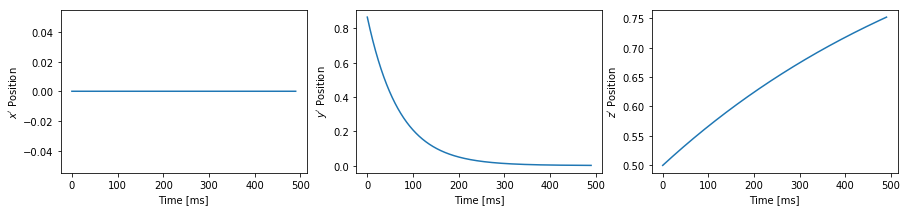

In [10]:
# RESULTS - 2D PLOTS

%matplotlib inline
plt.figure(figsize=(15,3))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(time_relax,M_relax_60[i,:])
    plt.xlabel('Time [ms]')
    if i == 0:
        plt.ylabel('$x^\prime$ Position')
    if i == 1:
        plt.ylabel('$y^\prime$ Position')
    if i == 2:
        plt.ylabel('$z^\prime$ Position')
plt.show()

In [ ]:
# RESULTS - 3D PLOTS

%matplotlib tk 
#change notebook to "tk" to open new window and allow interactiveness 
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"),figsize=(4,4))

def get_arrow(i):
    i = int(i)
    x = 0
    y = 0
    z = 0
    u = M_relax_60[0][i]
    v = M_relax_60[1][i]
    w = M_relax_60[2][i]
    return x,y,z,u,v,w

quiver = ax.quiver(*get_arrow(0))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel('$x^\prime$')
ax.set_ylabel('$y^\prime$')
ax.set_zlabel('$z^\prime$')
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])

def update(i):
    global quiver
    quiver.remove()
    quiver = ax.quiver(*get_arrow(i))

ani = FuncAnimation(fig, update, frames=np.arange(len(M_relax_60[0])), interval=10)
plt.draw()
plt.show()

## 4. Excitation + Relaxation for a 60º flip angle over 10 consecutive cycles

In [11]:
TR = 500  # Repetition time
n_cycles = 10  # Number of cycles

flipangle = np.pi*60/180; # 60 degrees in radians 

# Data for Excitation
deltaT    = 0.1    
exc_duration  = 10   # ms
exc_time      = np.linspace(0,exc_duration,int(exc_duration/deltaT) + 1)

# Data for Relaxation
T_obs = 490   # observation period, in ms 
time_relax = np.linspace(0,T_obs,int(T_obs/deltaT) + 1)

# Overall time data
duration = (len(exc_time) - 1 + len(time_relax) - 1)*n_cycles + 1
time_samples = range(0, duration)

# Create matrix M containing the x, y and z positions over the time period. Define initial vector position
M_60         = np.zeros((3,duration))
M_60[:,0]    = [0,0,1] 

for cycle in range(n_cycles):
    
    time = cycle*(len(exc_time) + len(time_relax) - 2)
    
    # Iteratively fill M with excitation data
    arg = flipangle*(deltaT/exc_duration); 
    for i in range(len(exc_time) - 1):
        Mx_new = 1*M_60[0,i+time] + 0*M_60[1,i+time]           + 0*M_60[2,i+time]
        My_new = 0*M_60[0,i+time] + np.cos(arg)*M_60[1,i+time] + np.sin(arg)*M_60[2,i+time]
        Mz_new = 0*M_60[0,i+time] - np.sin(arg)*M_60[1,i+time] + np.cos(arg)*M_60[2,i+time]
        M_60[:,time+i+1] = [Mx_new,My_new,Mz_new]
    
    time = len(exc_time) -1 + cycle*(len(exc_time) + len(time_relax) - 2)
    
    # Iteratively fill M with relaxation data
    for i in range(len(time_relax) -1):
        Mx_new = np.exp(-deltaT/T2)*M_60[0,i+time]
        My_new = np.exp(-deltaT/T2)*M_60[1,i+time]
        Mz_new = np.exp(-deltaT/T1)*M_60[2,i+time] + 1*(1-np.exp(-deltaT/T1))
        M_60[:,time+i+1] = [Mx_new,My_new,Mz_new]
      
print("Done")


Done


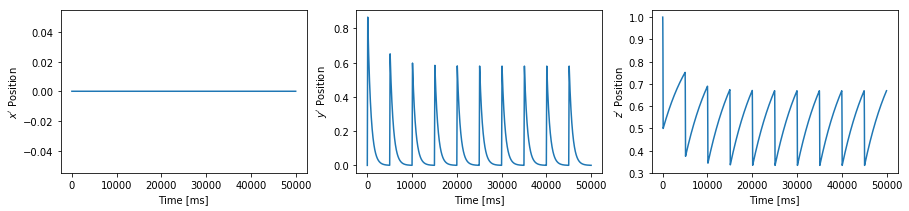

In [12]:
# RESULTS - 2D PLOTS

%matplotlib inline
plt.figure(figsize=(15,3))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(time_samples,M_60[i,:])
    plt.xlabel('Time [ms]')
    if i == 0:
        plt.ylabel('$x^\prime$ Position')
    if i == 1:
        plt.ylabel('$y^\prime$ Position')
    if i == 2:
        plt.ylabel('$z^\prime$ Position')
plt.show()

If we increase the observation time (repetition time = 2000):

Done


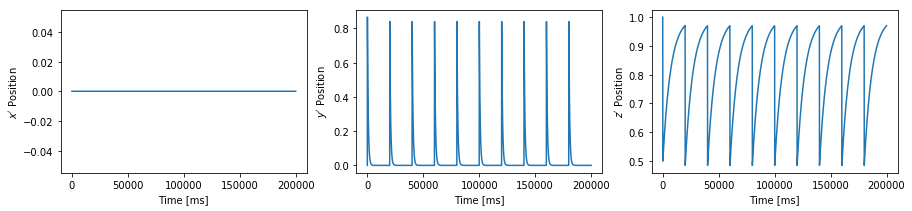

In [13]:
TR = 2000  # Repetition time
n_cycles = 10  # Number of cycles

flipangle = np.pi*60/180; # 60 degrees in radians 

# Data for Excitation
deltaT    = 0.1    
exc_duration  = 10   # ms
exc_time      = np.linspace(0,exc_duration,int(exc_duration/deltaT) + 1)

# Data for Relaxation
T_obs = 1990   # observation period, in ms 
time_relax = np.linspace(0,T_obs,int(T_obs/deltaT) + 1)

# Overall time data
duration = (len(exc_time) - 1 + len(time_relax) - 1)*n_cycles + 1
time_samples = range(0, duration)

# Create matrix M containing the x, y and z positions over the time period. Define initial vector position
M_60         = np.zeros((3,duration))
M_60[:,0]    = [0,0,1] 

for cycle in range(n_cycles):
    
    time = cycle*(len(exc_time) + len(time_relax) - 2)
    
    # Iteratively fill M with excitation data
    arg = flipangle*(deltaT/exc_duration); 
    for i in range(len(exc_time) - 1):
        Mx_new = 1*M_60[0,i+time] + 0*M_60[1,i+time]           + 0*M_60[2,i+time]
        My_new = 0*M_60[0,i+time] + np.cos(arg)*M_60[1,i+time] + np.sin(arg)*M_60[2,i+time]
        Mz_new = 0*M_60[0,i+time] - np.sin(arg)*M_60[1,i+time] + np.cos(arg)*M_60[2,i+time]
        M_60[:,time+i+1] = [Mx_new,My_new,Mz_new]
    
    time = len(exc_time) -1 + cycle*(len(exc_time) + len(time_relax) - 2)
    
    # Iteratively fill M with relaxation data
    for i in range(len(time_relax) -1):
        Mx_new = np.exp(-deltaT/T2)*M_60[0,i+time]
        My_new = np.exp(-deltaT/T2)*M_60[1,i+time]
        Mz_new = np.exp(-deltaT/T1)*M_60[2,i+time] + 1*(1-np.exp(-deltaT/T1))
        M_60[:,time+i+1] = [Mx_new,My_new,Mz_new]
      
print("Done")

# RESULTS - 2D PLOTS

%matplotlib inline
plt.figure(figsize=(15,3))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(time_samples,M_60[i,:])
    plt.xlabel('Time [ms]')
    if i == 0:
        plt.ylabel('$x^\prime$ Position')
    if i == 1:
        plt.ylabel('$y^\prime$ Position')
    if i == 2:
        plt.ylabel('$z^\prime$ Position')
plt.show()


If we increase the excitation time (repetition time = 600):

Done


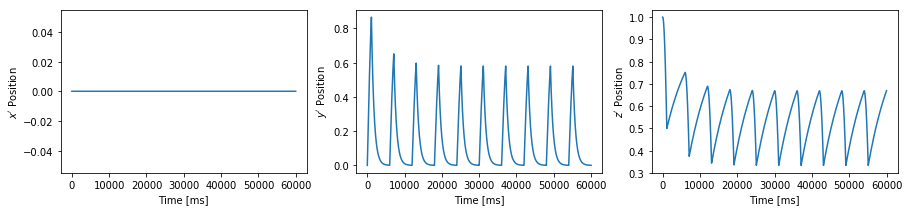

In [14]:
TR = 600  # Repetition time
n_cycles = 10  # Number of cycles

flipangle = np.pi*60/180; # 60 degrees in radians 

# Data for Excitation
deltaT    = 0.1    
exc_duration  = 110   # ms
exc_time      = np.linspace(0,exc_duration,int(exc_duration/deltaT) + 1)

# Data for Relaxation
T_obs = 490   # observation period, in ms 
time_relax = np.linspace(0,T_obs,int(T_obs/deltaT) + 1)

# Overall time data
duration = (len(exc_time) - 1 + len(time_relax) - 1)*n_cycles + 1
time_samples = range(0, duration)

# Create matrix M containing the x, y and z positions over the time period. Define initial vector position
M_60         = np.zeros((3,duration))
M_60[:,0]    = [0,0,1] 

for cycle in range(n_cycles):
    
    time = cycle*(len(exc_time) + len(time_relax) - 2)
    
    # Iteratively fill M with excitation data
    arg = flipangle*(deltaT/exc_duration); 
    for i in range(len(exc_time) - 1):
        Mx_new = 1*M_60[0,i+time] + 0*M_60[1,i+time]           + 0*M_60[2,i+time]
        My_new = 0*M_60[0,i+time] + np.cos(arg)*M_60[1,i+time] + np.sin(arg)*M_60[2,i+time]
        Mz_new = 0*M_60[0,i+time] - np.sin(arg)*M_60[1,i+time] + np.cos(arg)*M_60[2,i+time]
        M_60[:,time+i+1] = [Mx_new,My_new,Mz_new]
    
    time = len(exc_time) -1 + cycle*(len(exc_time) + len(time_relax) - 2)
    
    # Iteratively fill M with relaxation data
    for i in range(len(time_relax) -1):
        Mx_new = np.exp(-deltaT/T2)*M_60[0,i+time]
        My_new = np.exp(-deltaT/T2)*M_60[1,i+time]
        Mz_new = np.exp(-deltaT/T1)*M_60[2,i+time] + 1*(1-np.exp(-deltaT/T1))
        M_60[:,time+i+1] = [Mx_new,My_new,Mz_new]
      
print("Done")

# RESULTS - 2D PLOTS

%matplotlib inline
plt.figure(figsize=(15,3))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(time_samples,M_60[i,:])
    plt.xlabel('Time [ms]')
    if i == 0:
        plt.ylabel('$x^\prime$ Position')
    if i == 1:
        plt.ylabel('$y^\prime$ Position')
    if i == 2:
        plt.ylabel('$z^\prime$ Position')
plt.show()